<a href="https://colab.research.google.com/github/Bayrkdartech/My-colab-project/blob/main/Practic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       PassengerId    Survived      Pclass         Sex         Age  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586    0.649044   29.315152   
std     256.998173    0.486260    0.834700    0.477538   12.984932   
min       1.000000    0.000000    1.000000    0.000000    0.420000   
25%     224.000000    0.000000    2.000000    0.000000   22.000000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.000000    1.000000    3.000000    1.000000   35.000000   
max     891.000000    1.000000    3.000000    1.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  889.000000  889.000000  889.000000  889.000000  
mean     0.524184    0.382452   32.096681    0.362205  
std      1.103705    0.806761   49.697504    0.636157  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    7.895800    0.000000  
50%      0.000000    0.000000   1

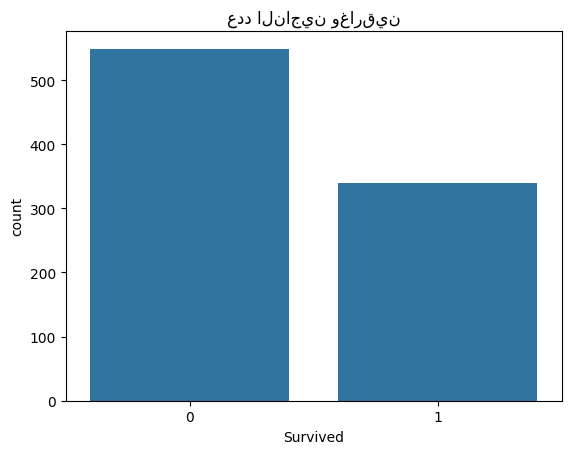

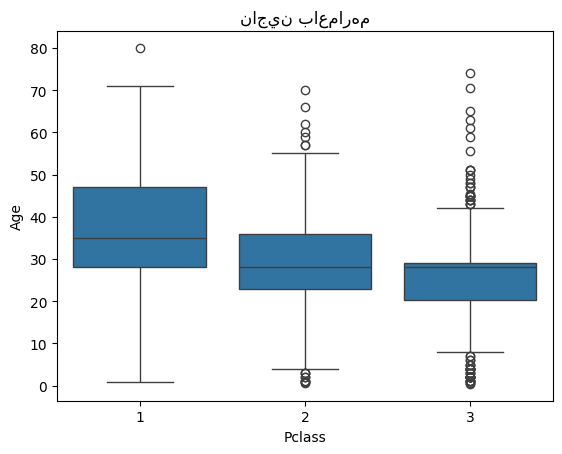

-2.0845555524766253
0.03739522542606732
258.4266104463763
3.7799096665576e-58
------> outliner using zscore


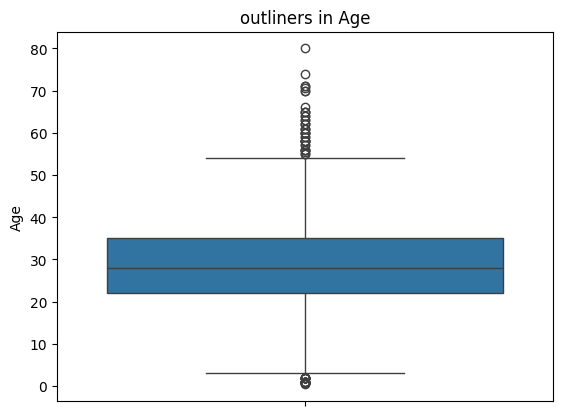

96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64
outliner using IQR
       Age
7     2.00
11   58.00
15   55.00
16    2.00
33   66.00
..     ...
824   2.00
827   1.00
831   0.83
851  74.00
879  56.00

[65 rows x 1 columns]


In [6]:

###########تحميل المكتبات
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
##########تحميل البيانات
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
##########تنظيف البيانات
df=pd.read_csv(url)
#معالجة واضافة
df['Age']=df['Age'].fillna(df['Age'].median())
#حدف القيم المفقودة
df.dropna(subset=['Embarked'], inplace=True )
#معالجة  قيم المكررة
df.drop_duplicates(inplace=True)
df['Sex']=df['Sex'].map({'male':1,'female':0})
df['Embarked']=df['Embarked'].map({'S':0,'C':1,'Q':2})

df.drop('Cabin', axis=1, inplace= True)
#########تحليل الوصفي
print(df.describe())
print(df['Pclass'].value_counts())
print(df['Survived'].value_counts())
print(df.isnull().sum())


#تصوير

sns.countplot(x='Survived', data=df)
plt.title('عدد الناجين وغارقين')
plt.show()


sns.boxplot(x='Pclass', y='Age', data=df)
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('ناجين باعمارهم')
plt.show()


#الاحصاء التطبيقي


survived_ages=df[df['Survived']==1]['Age']
nonsurvived_ages= df[df['Survived']==0]['Age']
t_stat,P_value= ttest_ind(survived_ages,nonsurvived_ages)
print(t_stat)
print(P_value)

count_tab= pd.crosstab(df['Sex'],df['Survived'])
chi2,P,_,_= chi2_contingency(count_tab)
print(chi2)
print(P)


#outliners11111
print("------> outliner using zscore")
sns.boxplot(df['Age'])
plt.title('outliners in Age')
plt.show()

zscores=stats.zscore(df['Age'].dropna())
outliner=df['Age'][abs(zscores)>3]
print(outliner)

#IQR اياد عناصر شادة
print("outliner using IQR")
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1

lower_band= Q1 - 1.5 * IQR
upper_band= Q3 + 1.5 * IQR

outliner= df[(df['Age']<lower_band) | (df['Age']> upper_band)]
print(outliner[['Age']])